In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
train_data = pd.read_csv('/content/Train.csv')
test_data = pd.read_csv('/content/Test.csv')
sample_data = pd.read_csv('/content/sample_submission.csv')

In [710]:
train_data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


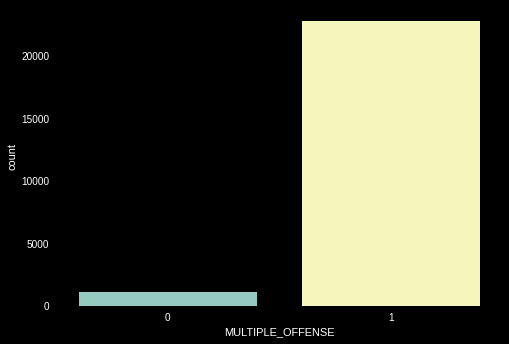

In [711]:
sns.countplot(data=train_data,x='MULTIPLE_OFFENSE')

In [712]:
train_data.isna().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [713]:
train_data['X_12'].unique()

array([ 1.,  0.,  3.,  2.,  6., 12.,  4., nan,  5., 11., 90., 20.,  8.,
       16., 30., 10.,  7., 50.,  9., 58., 14., 40., 15., 17.])

In [0]:
train_data['X_12'].fillna((train_data['X_12'].mean()),inplace=True)

In [715]:
train_data.isna().sum()

INCIDENT_ID         0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

In [716]:
train_data[:5]

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [717]:
test_data.isna().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [0]:
test_data['X_12'].fillna((test_data['X_12'].mean()), inplace=True)

In [719]:
test_data.isna().sum()

INCIDENT_ID    0
DATE           0
X_1            0
X_2            0
X_3            0
X_4            0
X_5            0
X_6            0
X_7            0
X_8            0
X_9            0
X_10           0
X_11           0
X_12           0
X_13           0
X_14           0
X_15           0
dtype: int64

In [0]:
train_data['WEEKDAY'] = pd.to_datetime(train_data['DATE']).dt.dayofweek
test_data['WEEKDAY'] = pd.to_datetime(test_data['DATE']).dt.dayofweek

In [721]:
train_data[:5]

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,WEEKDAY
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,6
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,2
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,4
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,2


In [0]:
train_data['IsWeekend'] = 0
train_data.loc[train_data['WEEKDAY'].isin([5, 6]), 'IsWeekend'] = 1

test_data['IsWeekend'] = 0
test_data.loc[test_data['WEEKDAY'].isin([5, 6]), 'IsWeekend'] = 1

In [723]:
train_data[:2]

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,WEEKDAY,IsWeekend
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,6,1
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,1,0


In [724]:
test_data[:5]

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,WEEKDAY,IsWeekend
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,0.972236,72,119,23,3,0
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.000000,12,29,34,4,0
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.000000,72,0,34,5,1
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.000000,112,87,34,4,0
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.000000,112,93,43,0,0


In [0]:
train_data.drop('DATE',axis=1,inplace=True)

In [0]:
test_data.drop('DATE',axis=1,inplace=True)

In [727]:
train_data.head()

,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,WEEKDAY,IsWeekend
0,CR_102659,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,6,1
1,CR_189752,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,1,0
2,CR_184637,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,2,0
3,CR_139071,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,4,0
4,CR_109335,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,2,0


In [728]:
test_data.head()

,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,WEEKDAY,IsWeekend
0,CR_195453,0,30,35,7,3,6,4,0,5,1,174,0.972236,72,119,23,3,0
1,CR_103520,0,44,44,1,3,7,1,4,6,1,316,0.000000,12,29,34,4,0
2,CR_196089,0,34,33,3,5,2,7,3,0,1,316,1.000000,72,0,34,5,1
3,CR_112195,7,3,2,3,5,9,8,0,5,1,174,1.000000,112,87,34,4,0
4,CR_149832,0,7,8,7,3,2,7,1,5,1,174,0.000000,112,93,43,0,0


In [729]:
train_data['INCIDENT_ID'].head()

0    CR_102659
1    CR_189752
2    CR_184637
3    CR_139071
4    CR_109335
Name: INCIDENT_ID, dtype: object

In [0]:
#train_data['INCIDENT_ID'] = train_data.INCIDENT_ID.str.slice(3,9)

In [0]:
#train_data['INCIDENT_ID']

In [732]:
test = test_data['INCIDENT_ID']
test

0        CR_195453
1        CR_103520
2        CR_196089
3        CR_112195
4        CR_149832
           ...    
15898     CR_44468
15899    CR_158460
15900    CR_115946
15901    CR_137663
15902     CR_33545
Name: INCIDENT_ID, Length: 15903, dtype: object

In [0]:
#test_data['INCIDENT_ID'] = test_data.INCIDENT_ID.str.slice(3,9)

In [0]:
#test_data.head()

Text(0, 0.5, 'Frequency')

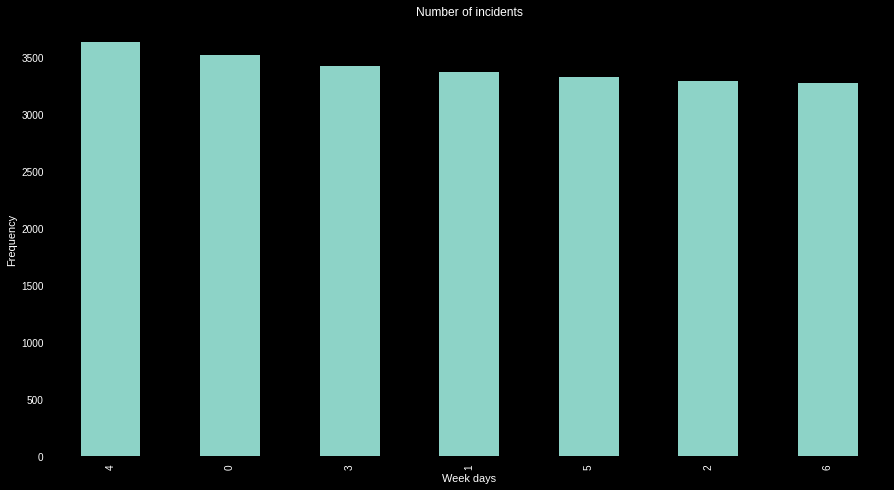

In [735]:
plt.style.use('dark_background')
ax = plt.figure(figsize = (15,8))

ax = train_data['WEEKDAY'].value_counts().plot(kind='bar',title='Number of incidents')
ax.set_xlabel("Week days")
ax.set_ylabel("Frequency")

**Most number of hacking incidents are happening on Friday**

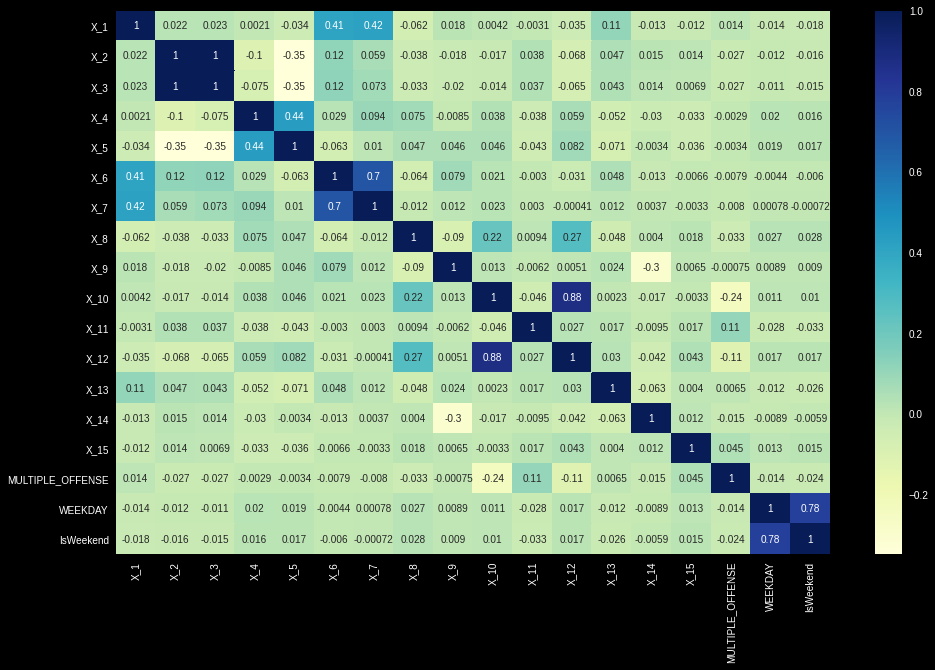

In [736]:
plt.figure(figsize = (16, 10))
sns.heatmap(train_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [0]:
X = train_data.iloc[:,2:-1]
y = train_data['MULTIPLE_OFFENSE']

In [738]:
X.head()

,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,WEEKDAY
0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,6
1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,1
2,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,2
3,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,4
4,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,2


In [739]:
y[:5]

0    0
1    1
2    1
3    1
4    1
Name: MULTIPLE_OFFENSE, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)

In [742]:
X_train.shape

(16699, 16)

In [743]:
X_val.shape

(7157, 16)

In [744]:
X_train.isna().sum()

X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
WEEKDAY             0
dtype: int64

In [745]:
X_val.isna().sum()

X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
WEEKDAY             0
dtype: int64

In [746]:
y_train.shape

(16699,)

In [747]:
y_val.isna().sum()

0

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
sc = MinMaxScaler()

In [0]:
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [0]:
y_train = np.array(y_train)

In [0]:
y_val = np.array(y_val)

In [753]:
X_train

array([[0.90384615, 0.92307692, 0.7       , ..., 0.68      , 1.        ,
        1.        ],
       [0.94230769, 0.94230769, 0.6       , ..., 0.68      , 1.        ,
        1.        ],
       [0.07692308, 0.07692308, 0.6       , ..., 0.68      , 1.        ,
        0.5       ],
       ...,
       [0.46153846, 0.46153846, 0.        , ..., 0.68      , 1.        ,
        0.33333333],
       [0.86538462, 0.86538462, 1.        , ..., 0.68      , 1.        ,
        1.        ],
       [0.40384615, 0.44230769, 0.4       , ..., 0.46      , 1.        ,
        0.        ]])

In [754]:
X_val

array([[0.94230769, 0.94230769, 0.6       , ..., 0.68      , 1.        ,
        1.        ],
       [0.07692308, 0.07692308, 0.6       , ..., 0.68      , 1.        ,
        0.16666667],
       [0.75      , 0.75      , 0.6       , ..., 0.68      , 1.        ,
        1.        ],
       ...,
       [0.69230769, 0.65384615, 0.2       , ..., 0.86      , 1.        ,
        0.33333333],
       [0.05769231, 0.03846154, 0.3       , ..., 0.68      , 1.        ,
        0.33333333],
       [0.07692308, 0.07692308, 0.6       , ..., 0.68      , 1.        ,
        0.66666667]])

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization

In [0]:
model = Sequential()

In [0]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [759]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=16,epochs=10)

Train on 16699 samples, validate on 7157 samples
Epoch 1/10
16699/16699 [==============================] - 2s 113us/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 4.3304e-05 - val_accuracy: 1.0000
Epoch 2/10
16699/16699 [==============================] - 2s 102us/step - loss: 3.1683e-04 - accuracy: 1.0000 - val_loss: 4.5692e-06 - val_accuracy: 1.0000
Epoch 3/10
16699/16699 [==============================] - 2s 103us/step - loss: 1.2250e-04 - accuracy: 1.0000 - val_loss: 4.2581e-07 - val_accuracy: 1.0000
Epoch 4/10
16699/16699 [==============================] - 2s 103us/step - loss: 4.5696e-05 - accuracy: 1.0000 - val_loss: 1.2059e-07 - val_accuracy: 1.0000
Epoch 5/10
16699/16699 [==============================] - 2s 110us/step - loss: 4.5306e-05 - accuracy: 1.0000 - val_loss: 5.2172e-08 - val_accuracy: 1.0000
Epoch 6/10
16699/16699 [==============================] - 2s 110us/step - loss: 3.0525e-05 - accuracy: 1.0000 - val_loss: 5.4344e-09 - val_accuracy: 1.0000
Epoch 7/10
16699/16

In [0]:
X_test = test_data.iloc[:,2:]

In [761]:
X_test.head()

,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,WEEKDAY,IsWeekend
0,30,35,7,3,6,4,0,5,1,174,0.972236,72,119,23,3,0
1,44,44,1,3,7,1,4,6,1,316,0.000000,12,29,34,4,0
2,34,33,3,5,2,7,3,0,1,316,1.000000,72,0,34,5,1
3,3,2,3,5,9,8,0,5,1,174,1.000000,112,87,34,4,0
4,7,8,7,3,2,7,1,5,1,174,0.000000,112,93,43,0,0


In [762]:
X_test.shape

(15903, 16)

In [0]:
X_test = sc.transform(X_test)

In [764]:
X_test

array([[0.57692308, 0.67307692, 0.7       , ..., 0.46      , 3.        ,
        0.        ],
       [0.84615385, 0.84615385, 0.1       , ..., 0.68      , 4.        ,
        0.        ],
       [0.65384615, 0.63461538, 0.3       , ..., 0.68      , 5.        ,
        0.16666667],
       ...,
       [0.5       , 0.51923077, 0.9       , ..., 0.68      , 5.        ,
        0.16666667],
       [0.40384615, 0.44230769, 0.4       , ..., 0.68      , 4.        ,
        0.        ],
       [0.07692308, 0.07692308, 0.6       , ..., 0.68      , 2.        ,
        0.        ]])

In [765]:
y_pred = model.predict_classes(X_test)
y_pred[:5]

array([[1],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [766]:
y_pred.shape

(15903, 1)

In [0]:
y_pred = y_pred.reshape(-1)

In [768]:
score = model.evaluate(X_test,y_pred)
score

15903/15903 [==============================] - 0s 20us/step


[4.447504298494212e-09, 1.0]

In [769]:
print("Accuracy rate: {}".format(score[1]*100))

Accuracy rate: 100.0


In [770]:
y = test_data['INCIDENT_ID']
y

0        CR_195453
1        CR_103520
2        CR_196089
3        CR_112195
4        CR_149832
           ...    
15898     CR_44468
15899    CR_158460
15900    CR_115946
15901    CR_137663
15902     CR_33545
Name: INCIDENT_ID, Length: 15903, dtype: object

In [0]:
my_submission = pd.DataFrame({'INCIDENT_ID' : y ,
                              'MULTIPLE_OFFENSE' : y_pred})

In [772]:
my_submission.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,0


In [0]:
my_submission.to_csv('Prediction.csv' , index=False)

In [0]:
pred = pd.read_csv('/content/Prediction.csv')

In [775]:
pred.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,0
